In [87]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data_df = pd.read_csv("data.csv", parse_dates=["Date"])

format_demand = lambda x: pd.to_numeric(str(x).strip("()"))

data_df["Order_Demand"] = [format_demand(x[1]["Order_Demand"]) for x in data_df.iterrows()]

formatted_df = data_df[data_df["Order_Demand"] != 0].dropna()

print(formatted_df.dtypes)

Product_Code                object
Warehouse                   object
Product_Category            object
Date                datetime64[ns]
Order_Demand                 int64
dtype: object


In [17]:
formatted_df.pivot_table(values="Order_Demand", index="Product_Category", aggfunc=[np.sum, np.mean, np.median, min, max, "count"])

,sum,mean,median,min,max,count
,Order_Demand,Order_Demand,Order_Demand,Order_Demand,Order_Demand,Order_Demand
Product_Category,,,,,,
Category_001,1757473,18.038130,5,1,2075,97431
Category_002,628,8.155844,4,1,60,77
Category_003,392950,95.122246,32,1,1860,4131
Category_004,99046,302.892966,200,1,2400,327
Category_005,199674520,1976.916725,500,10,500000,101003
Category_006,405571330,11501.654189,3000,1,1000000,35262
Category_007,128691531,1570.749799,100,1,1144000,81930
Category_008,17568,11.305019,4,1,200,1554


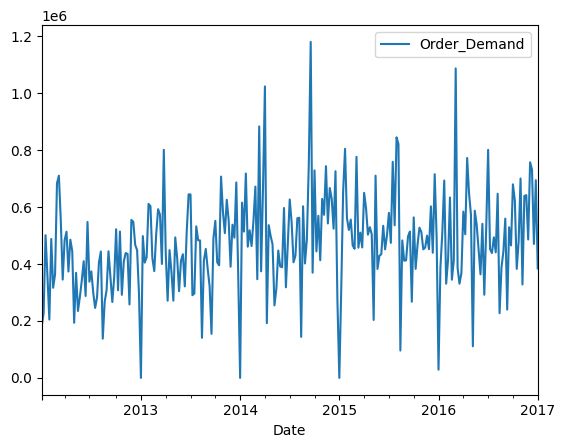

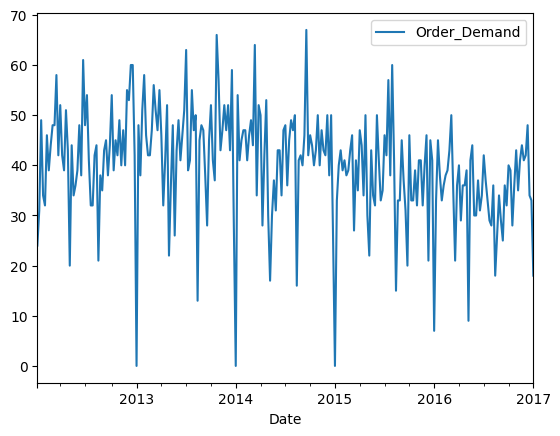

In [88]:
product1295 = formatted_df[formatted_df["Product_Code"] == "Product_1295"]

product1295_pivot = product1295.pivot_table(values="Order_Demand", index="Date", aggfunc=[np.sum, min, max, "count"])

# grouped_product1295 = product1295.groupby("Date")["Order_Demand"].sum().reset_index()
weekly_product1295 = product1295.groupby(pd.Grouper(key="Date", freq="W")).sum().reset_index()

weekly_product1295.plot(x="Date", y="Order_Demand", kind="line")
# plt.show()

# order_count_product1295 = product1295.groupby("Date")["Order_Demand"].count().reset_index()
weeklyorder_product1295 = product1295.groupby(pd.Grouper(key="Date", freq="W")).count().reset_index()

weeklyorder_product1295.plot(x="Date", y="Order_Demand", kind="line")
plt.show()

In [90]:
print(product1295_pivot)

                    sum          min          max        count
           Order_Demand Order_Demand Order_Demand Order_Demand
Date                                                          
2012-01-05        78700          100        20000            8
2012-01-06       102100          100        40000           16
2012-01-10       134000         1000        60000            9
2012-01-11        37600          200        20000            8
2012-01-12        32100          100        10000            9
...                 ...          ...          ...          ...
2016-12-21       248000         3000        50000           11
2016-12-22       220000        20000       100000            5
2016-12-26       300000        10000       100000           11
2016-12-27        31300          100        20000            5
2016-12-28        53000         3000        50000            2

[1214 rows x 4 columns]


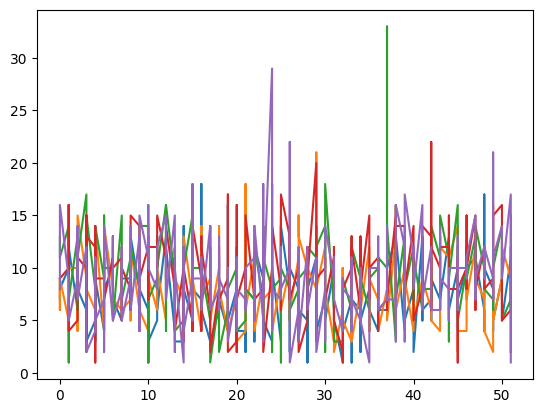

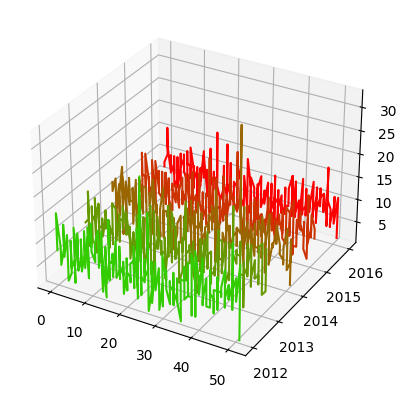

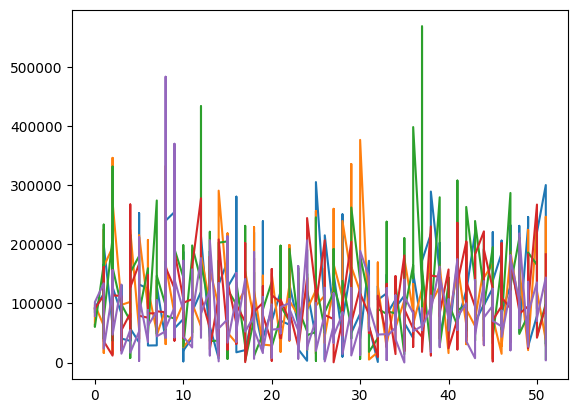

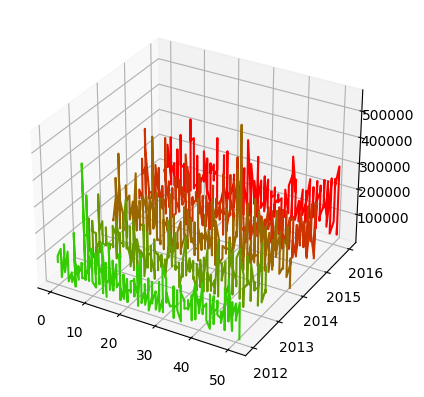

In [99]:
from datetime import datetime
import copy

def dt_to_n(dt):
    dt_unix = dt.timestamp()
    year_unix = datetime(dt.year, 1, 1).timestamp()
    relative_unix = dt_unix - year_unix
    return relative_unix//(86400 * 7)

prod1295 = copy.copy(product1295_pivot)
prod1295["days"] = [dt_to_n(i) for i,_ in prod1295.iterrows()]

prod1295["year"] = [i.year for i,_ in prod1295.iterrows()]

plt_2d = plt.figure().add_subplot()
plt_3d = plt.figure().add_subplot(projection='3d')

annual_data = prod1295.groupby("year")
i=0
t = len(annual_data)
for year, year_data in reversed(tuple(annual_data)):
    plt_2d.plot(year_data["days"], year_data[("count","Order_Demand")])
    plt_3d.plot(year_data["days"], year_data[("count","Order_Demand")], zs=year, zdir='y', c=((t-i)/t, i/t, 0))
    i+=1

plt_2d_sum = plt.figure().add_subplot()
plt_3d_sum = plt.figure().add_subplot(projection='3d')
annual_data_sum = prod1295.groupby("year")
i=0
t = len(annual_data_sum)
for year, year_data in reversed(tuple(annual_data_sum)):
    plt_2d_sum.plot(year_data["days"], year_data[("sum","Order_Demand")])
    plt_3d_sum.plot(year_data["days"], year_data[("sum","Order_Demand")], zs=year, zdir='y', c=((t-i)/t, i/t, 0))
    i+=1
plt.show()

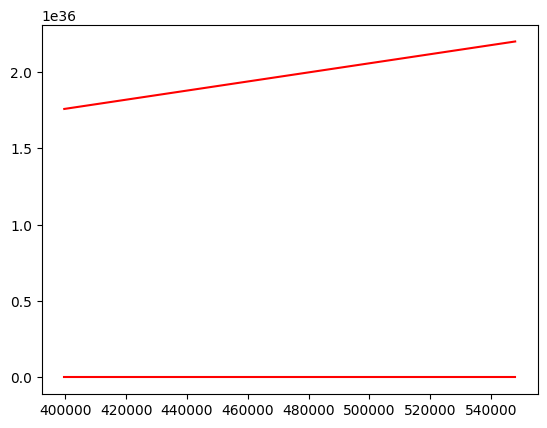

In [128]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

linear_model = LinearRegression()
poly_features = PolynomialFeatures(degree=2, include_bias=False)

modelX = weekly_product1295["Date"].values.astype(np.int64)[:, np.newaxis]
polyX = poly_features.fit_transform(modelX)

linear_model.fit(polyX, weekly_product1295["Order_Demand"])

intercept = linear_model.intercept_
coef = linear_model.coef_

x_vals = np.linspace(modelX.min(), modelX.max(), 261).reshape(261,1)
polyX_new = poly_features.transform(x_vals)
y_new = linear_model.predict(polyX_new)

plt.plot(weekly_product1295["Date"], weekly_product1295["Order_Demand"], label="Data", color="blue")
plt.plot(y_new, polyX_new, color="red", label="Regression Line")
plt.show()

In [77]:
product_demand_pivot = formatted_df.pivot_table(values="Order_Demand", index="Product_Code", aggfunc=["count", np.sum])
# print(product_demand_pivot)
order_quantity = product_demand_pivot.sort_values(by=("sum", "Order_Demand"), ascending=False)
order_number = product_demand_pivot.sort_values(by=("count", "Order_Demand"), ascending=False)
print(order_quantity.head())
print(order_number.head())

                    count          sum
             Order_Demand Order_Demand
Product_Code                          
Product_1359        16885    472474000
Product_1248         6323    289117000
Product_0083         1984    210651000
Product_1341         2659    169777000
Product_1295        10464    123303000
                    count          sum
             Order_Demand Order_Demand
Product_Code                          
Product_1359        16885    472474000
Product_1295        10464    123303000
Product_1378         9672     83632700
Product_0620         9391        56789
Product_1286         8804    101566400


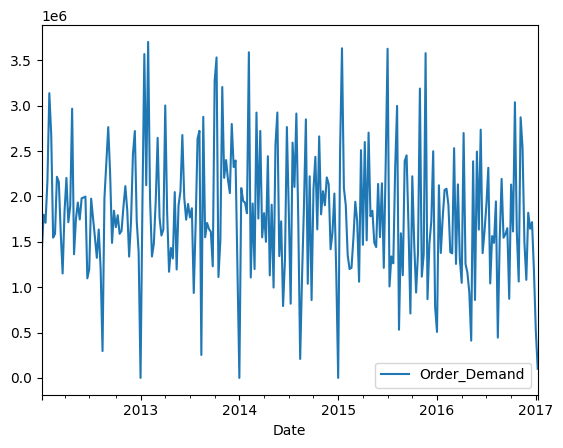

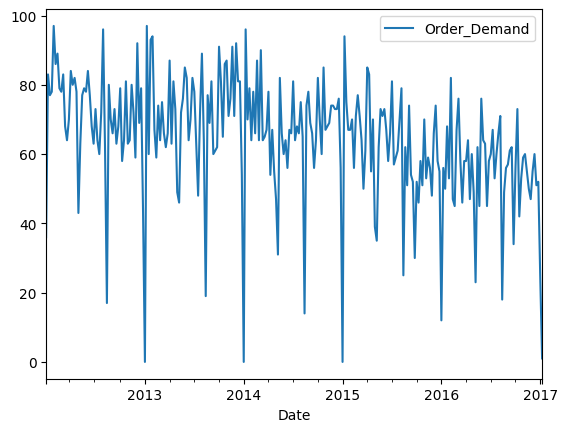

In [72]:
product1359 = formatted_df[formatted_df["Product_Code"] == "Product_1359"]

# grouped_product1295 = product1295.groupby("Date")["Order_Demand"].sum().reset_index()
weekly_product1359 = product1359.groupby(pd.Grouper(key="Date", freq="W")).sum().reset_index()
weekly_product1359.plot(x="Date", y="Order_Demand", kind="line")
# plt.show()

# order_count_product1295 = product1295.groupby("Date")["Order_Demand"].count().reset_index()
weeklyorder_product1359 = product1359.groupby(pd.Grouper(key="Date", freq="W")).count().reset_index()
weeklyorder_product1359.plot(x="Date", y="Order_Demand", kind="line")

plt.show()

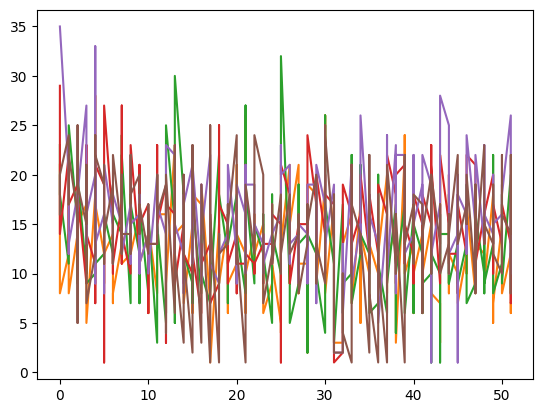

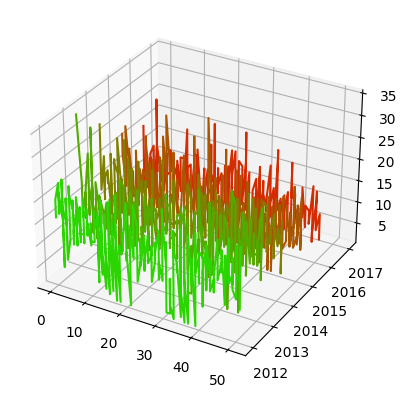

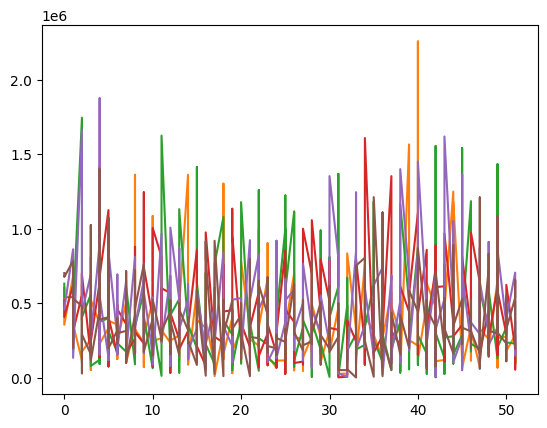

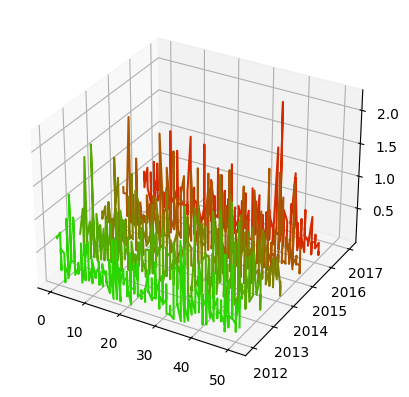

In [100]:
product1359_pivot = product1359.pivot_table(values="Order_Demand", index="Date", aggfunc=[np.sum, "count"])

prod1359 = copy.copy(product1359_pivot)
prod1359["days"] = [dt_to_n(i) for i,_ in prod1359.iterrows()]

prod1359["year"] = [i.year for i,_ in prod1359.iterrows()]

plt_2d = plt.figure().add_subplot()
plt_3d = plt.figure().add_subplot(projection='3d')

annual_data_2 = prod1359.groupby("year")
i=0
t = len(annual_data_2)
for year, year_data in reversed(tuple(annual_data_2)):
    plt_2d.plot(year_data["days"], year_data[("count","Order_Demand")])
    plt_3d.plot(year_data["days"], year_data[("count","Order_Demand")], zs=year, zdir='y', c=((t-i)/t, i/t, 0))
    i+=1

plt_2d_sum = plt.figure().add_subplot()
plt_3d_sum = plt.figure().add_subplot(projection='3d')
annual_data_sum_2 = prod1359.groupby("year")
i=0
t = len(annual_data_sum_2)
for year, year_data in reversed(tuple(annual_data_sum_2)):
    plt_2d_sum.plot(year_data["days"], year_data[("sum","Order_Demand")])
    plt_3d_sum.plot(year_data["days"], year_data[("sum","Order_Demand")], zs=year, zdir='y', c=((t-i)/t, i/t, 0))
    i+=1
plt.show()
